# Kümeleme" (Clustering)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_excel(r'excel\veri_on_isleme_ve_ozellik_muhendisligi.xlsx')
df.fillna(df['Gelir'].mean(),inplace=True)
le = LabelEncoder()
df['Cinsiyet'] = le.fit_transform(df['Cinsiyet'])
df['Meslek'] = le.fit_transform(df['Meslek'])
# 0 Erkek, 1 Kadın
# 0 Avukat, 1 Doktor, 2 Mühendis, 3 Öğretmen
df

,ID,Cinsiyet,Yaş,Gelir,Meslek
0,1,0,25,3000.00,2
1,2,1,32,5000.00,1
2,3,1,45,4206.25,3
3,4,0,22,3200.00,0
4,5,1,38,4500.00,2
5,6,0,28,2900.00,1
6,7,1,33,5100.00,3
7,8,0,41,4206.25,0
8,9,1,37,6000.00,2
9,10,0,23,2700.00,1


<module 'matplotlib.pyplot' from 'c:\\Users\\amate\\Desktop\\Uni\\Python_ve_Yapay_Zekaya_Giris\\python-kutuphaneler\\env\\Lib\\site-packages\\matplotlib\\pyplot.py'>

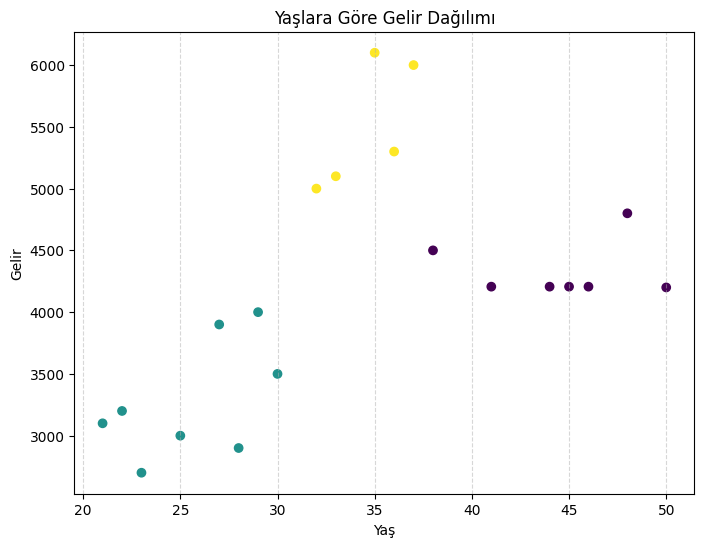

In [12]:
X = df[['Yaş','Gelir']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X_scaled)
df['Küme'] = kmeans.labels_
plt.figure(figsize=(8,6))
plt.scatter(df['Yaş'],df['Gelir'],c=df['Küme'],cmap='viridis')
plt.title('Yaşlara Göre Gelir Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Gelir')
plt.grid(axis='x', alpha=0.5, linestyle='--')
plt

In [ ]:
%reset -f

---
        

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder


df = pd.read_excel(r'excel\teknolojik_urunler_zamanli.xlsx')
df

,Ürün No,Ürün Adı,Kategori,Satış,Fiyat (TL),Toplam Fiyat (TL),Tarih
0,1,Akıllı Telefon,Mobil Cihazlar,10,5000,50000,2026-01-07
1,2,Dizüstü Bilgisayar,Bilgisayarlar,7,8500,59500,2026-01-07
2,3,Tablet,Mobil Cihazlar,15,3000,45000,2025-10-07
3,4,Akıllı Saat,Aksesuarlar,20,1500,30000,2025-09-25
4,5,Kablosuz Kulaklık,Aksesuarlar,25,800,20000,2025-11-10
5,6,Oyun Konsolu,Oyun Cihazları,5,4000,20000,2026-01-19
6,7,Masaüstü Bilgisayar,Bilgisayarlar,3,10000,30000,2025-08-15
7,8,Akıllı Ev Asistanı,Akıllı Ev Ürünleri,12,2000,24000,2025-09-20
8,9,4K Televizyon,Televizyonlar,8,7500,60000,2025-11-20
9,10,Bluetooth Hoparlör,Aksesuarlar,18,1200,21600,2025-12-24


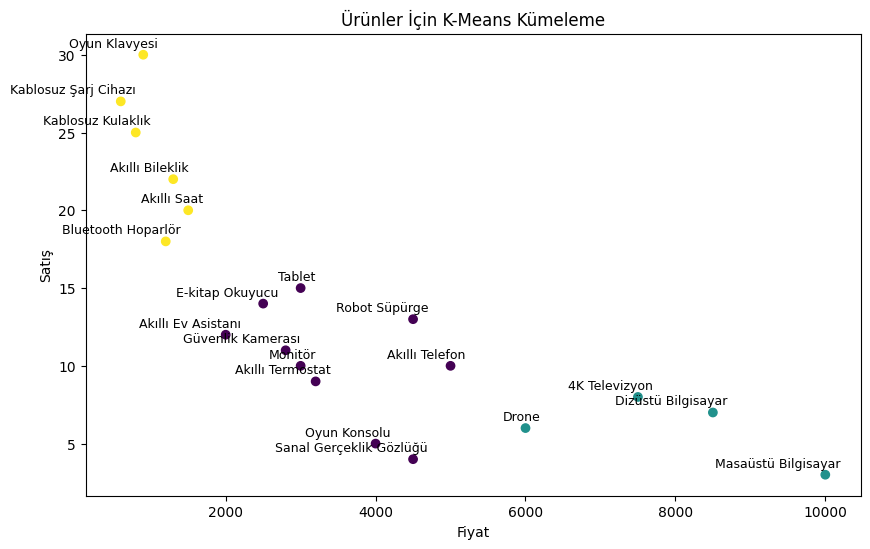

In [42]:
# Modelde kullanacağımız değişkenleri seçelim
X = df[['Fiyat (TL)','Satış']]
# Veriyi standartlaştır (Mean=0, Std=1 olacak şekilde dönüştürür)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modeli başlat ve eğit
kmeans = KMeans(n_clusters=3, random_state=42)
# Kümeleri tahmin et ve veri setine yeni bir sütun olarak ekle
df['Küme'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(10,6))
plt.scatter(df['Fiyat (TL)'],df['Satış'],c=df['Küme'],cmap='viridis')
plt.title('Ürünler İçin K-Means Kümeleme')
plt.xlabel('Fiyat')
plt.ylabel('Satış')

for i in range(len(df)):
    plt.text(df['Fiyat (TL)'][i] + 200, df['Satış'][i] + 0.5, df['Ürün Adı'][i],fontsize=9,ha='right')
plt.show()



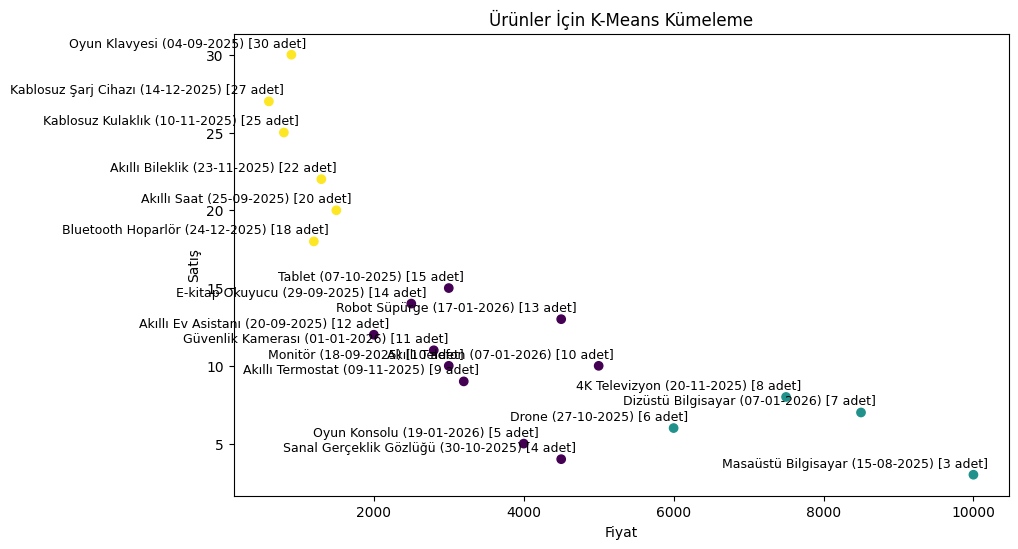

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(df['Fiyat (TL)'],df['Satış'],c=df['Küme'],cmap='viridis')
plt.title('Ürünler İçin K-Means Kümeleme')
plt.xlabel('Fiyat')
plt.ylabel('Satış')
for i in range(len(df)):
    urun_adi_tarih_satis = f"{df['Ürün Adı'][i]} ({df['Tarih'][i].strftime('%d-%m-%Y')}) [{df['Satış'][i]} adet]"
    plt.text(df['Fiyat (TL)'][i] + 200, df['Satış'][i] + 0.5, urun_adi_tarih_satis,fontsize=9,ha='right')
plt.show()